In [1]:
from src import Hamiltonian
import torch
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class HarmonicOscillator(Hamiltonian):

    def __init__(self, k):
        self._k = k

    @property
    def k(self):
        return self._k

    def evaluate(self, q, p, m):
        T = (0.5 * (p**2).sum(1) / m).sum()
        U = (0.5 * self.k * q**2).sum()
        return T + U

In [4]:
oscillator = HarmonicOscillator(k=torch.tensor([1.0, 1.0, 5.0]))

In [5]:
q0 = torch.tensor([[1.0, 0.0, 1.0], [0.0, 1.0, 1.0]], requires_grad=True)
p0 = torch.tensor([[0.0, 1.0, 0.0], [1.0, 0.0, 5.0]], requires_grad=True)
m = torch.tensor([1.0, 5.0])

In [6]:
time, h_hist, q_hist, p_hist = oscillator.simulate(q0, p0, 20, 20e-4, m=m)

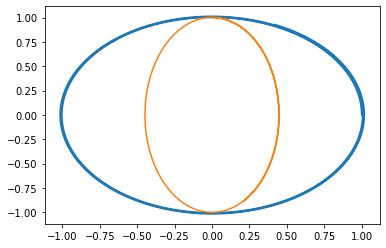

In [7]:
plt.plot(q_hist[:, 0, 0], q_hist[:, 0, 1]);
plt.plot(q_hist[:, 1, 0], q_hist[:, 1, 1]);

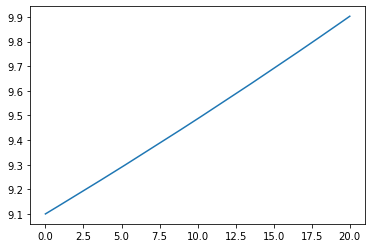

In [8]:
plt.plot(time, h_hist);

In [9]:
class NBodySystem(Hamiltonian):

    def __init__(self, G):
        self._G = G

    @property
    def G(self):
        return self._G

    def evaluate(self, q, p, m):
        T = (0.5 * (p**2).sum(1) / m).sum()
        U = 0
        for i in range(q.shape[0]):
            for j in range(i + 1, q.shape[0]):
                U -= self.G * m[i] * m[j] / (q[i] - q[j]).norm()
        return T + U

In [10]:
n_bodies = NBodySystem(G=1)

In [11]:
q0 = torch.tensor([[0.0, 0.0, 0.0], [1, 0, 0]], requires_grad=True)
p0 = torch.tensor([[0.0, 0.0, 0.0], [0, 1e3, 0]], requires_grad=True)
m = torch.tensor([1e6, 1])

In [12]:
time, h_hist, q_hist, p_hist = n_bodies.simulate(q0, p0, 0.05, 0.1e-4, m=m)

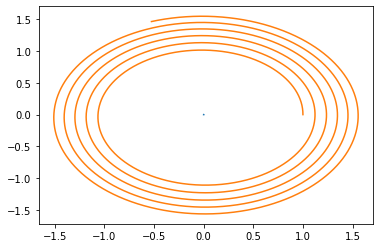

In [13]:
plt.plot(q_hist[:, 0, 0], q_hist[:, 0, 1]);
plt.plot(q_hist[:, 1, 0], q_hist[:, 1, 1]);

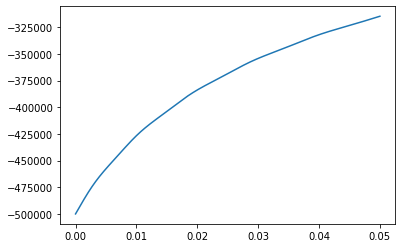

In [14]:
plt.plot(time, h_hist);